Epoch 1/150
781/781 [==============================] - 26s 33ms/step - loss: 1.6408 - accuracy: 0.4163 - val_loss: 1.4782 - val_accuracy: 0.5017 - lr: 0.0010
Epoch 2/150
781/781 [==============================] - 26s 33ms/step - loss: 1.0957 - accuracy: 0.6105 - val_loss: 0.9117 - val_accuracy: 0.6838 - lr: 0.0010
Epoch 3/150
781/781 [==============================] - 26s 33ms/step - loss: 0.8894 - accuracy: 0.6925 - val_loss: 0.7474 - val_accuracy: 0.7388 - lr: 0.0010
Epoch 4/150
781/781 [==============================] - 26s 33ms/step - loss: 0.7893 - accuracy: 0.7271 - val_loss: 1.0275 - val_accuracy: 0.6677 - lr: 0.0010
Epoch 5/150
781/781 [==============================] - 26s 33ms/step - loss: 0.7146 - accuracy: 0.7525 - val_loss: 0.8319 - val_accuracy: 0.7246 - lr: 0.0010
Epoch 6/150
781/781 [==============================] - 26s 33ms/step - loss: 0.6648 - accuracy: 0.7727 - val_loss: 0.6193 - val_accuracy: 0.7868 - lr: 0.0010
Epoch 7/150
781/781 [==============================]

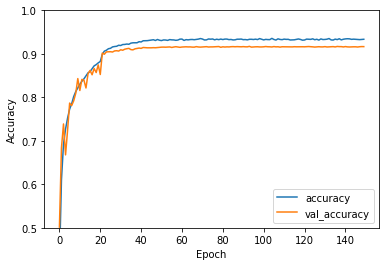

In [7]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Activation, Dropout, Dense, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the images
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One hot encode the labels
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

# Data augmentation
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(train_images)

# Enhanced CNN Model
model = Sequential()

# First Convolution Block
model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Second Convolution Block
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Third Convolution Block
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fourth Convolution Block
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate scheduler
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 80:
        lr *= 0.5e-3
    elif epoch > 60:
        lr *= 1e-3
    elif epoch > 40:
        lr *= 1e-2
    elif epoch > 20:
        lr *= 1e-1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)
model_checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    steps_per_epoch=len(train_images) // 64,
                    epochs=150,
                    validation_data=(test_images, test_labels),
                    callbacks=[lr_scheduler, model_checkpoint])

# Evaluate the model
model.load_weights('best_cnn_model.h5')
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plotting the results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
